# Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.9.1


# Implement AND gate using Perceptrion

In [2]:
data = {'x1':[0,0,1,1], "x2":[0,1,0,1], "y":[0,0,0,1]}
AND = pd.DataFrame(data)
print(f"the truth table of AND gate")
AND

the truth table of AND gate


,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
and_array = np.array(AND)
and_array

array([[0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 1]], dtype=int64)

In [4]:
X = and_array[:,:2]
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

## matrix of input features

In [5]:
print(f"X represents the matrix of input features (x1,x2) \n {X}")

X represents the matrix of input features (x1,x2) 
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [6]:
y= and_array[:,2:]

In [7]:
y

array([[0],
       [0],
       [0],
       [1]], dtype=int64)

## extra input node X0 for baise term

In [8]:
ones = np.ones((4,1))
ones

array([[1.],
       [1.],
       [1.],
       [1.]])

In [9]:

X_with_bias = np.c_[ones,X]

In [10]:
print(f"add extra input node X0 that always has a value of 1 \n {X_with_bias}")

add extra input node X0 that always has a value of 1 
 [[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


In [11]:
print("extra input node that always has a value of 1")

extra input node that always has a value of 1


In [12]:
X_with_bias.shape

(4, 3)

## Randomly intialise Weight Matrix W

In [23]:
weights = np.random.rand(3,1)* 1e-4

In [24]:
weights

array([[4.61713575e-05],
       [9.94135130e-05],
       [4.69071629e-05]])

In [25]:
weights.shape

(3, 1)

# Perceptron Trainnig steps

## Step1 - calculate weighted sum of inputs

In [27]:
X_with_bias.shape, weights.shape

((4, 3), (3, 1))

In [26]:
z = np.dot(X_with_bias,weights)
z

array([[4.61713575e-05],
       [9.30785203e-05],
       [1.45584870e-04],
       [1.92492033e-04]])

## Step2 - Apply Activation function (Step Function)

In [31]:
def activation_fun(z):
    y_hat = np.where(z>0,1,0)
    return y_hat

### output prediction y_hat

In [32]:
y_hat = activation_fun(z)
y_hat

array([[1],
       [1],
       [1],
       [1]])

## Step3- Error Calculation

In [35]:
error = y_hat - y

In [36]:
error

array([[1],
       [1],
       [1],
       [0]], dtype=int64)

In [37]:
X_with_bias.T.shape

(3, 4)

In [38]:
error.shape

(4, 1)

## Step4- Weight updation with the help of weight updation rule rule

In [39]:
eta =0.01
weights = weights - eta * np.dot(X_with_bias.T, error)

In [40]:
print(f"the updated weights \n {weights}")

the updated weights 
 [[-0.02995383]
 [-0.00990059]
 [-0.00995309]]


In [43]:
z = np.dot(X_with_bias,weights)
y_hat = activation_fun(z)
y_hat

array([[0],
       [0],
       [0],
       [0]])

In [86]:
error = y_hat - y

In [87]:
error

array([[0],
       [0],
       [0],
       [0]], dtype=int64)

In [72]:
y

array([[0],
       [0],
       [0],
       [1]], dtype=int64)

### Weight updation 2nd step

In [44]:
eta =0.01
weights = weights - eta * np.dot(X_with_bias.T, error)
print(f"the updated weights \n {weights}")

the updated weights 
 [[-0.05995383]
 [-0.01990059]
 [-0.01995309]]


In [45]:
z = np.dot(X_with_bias,weights)
y_hat = activation_fun(z)
y_hat

array([[0],
       [0],
       [0],
       [0]])

In [47]:
error = y_hat - y
error

array([[ 0],
       [ 0],
       [ 0],
       [-1]], dtype=int64)

### weight updation in last step

In [63]:
eta =0.01
weights = weights - eta * np.dot(X_with_bias.T, error)
print(f"the updated weights \n {weights}")

the updated weights 
 [[-0.02995383]
 [ 0.02009941]
 [ 0.02004691]]


In [64]:
z = np.dot(X_with_bias,weights)
y_hat = activation_fun(z)
y_hat

array([[0],
       [0],
       [0],
       [1]])

In [65]:
error = y_hat - y
error

array([[0],
       [0],
       [0],
       [0]], dtype=int64)

## Combining all steps in single function for training and creating a custom class for training and prediction

## Perceptron class for training and prediction 

In [59]:
class Percptron:
    def __init__(self, eta, epochs):
        self.eta= eta 
        self.epochs = epochs
        self.weights = np.random.randn(3,1)*1e-4
        
        def activation_fun(z):
            y_hat = np.where(z>0,1,0)
            return y_hat
        self.activation_fun = activation_fun
        
    
    def fit(self, X,y):
        ones= np.ones((4,1))
        X_with_bias = np.c_[ones,X]
        print(f"the matrix of input features with extra column of ones for bias \n {X_with_bias}")
        print(f"random intialised weights \n  {self.weights}")
        
        print(f"\n start of the iteration of epochs ")
        for epoch in range(self.epochs):
            print("###########################################################")
            print(f"epoch  {epoch}")
            z = np.dot(X_with_bias, self.weights)
            y_hat = self.activation_fun(z)
            print(f"predicted output y_hat \n {y_hat}")
            error = y - y_hat 
            print(f"error \n {error}")

            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print(f"eta = {self.eta}")
            print('weights updataion with the help of weight updation rule\n (wt=wt+eta*error*X_with_bias)')
            print(f"updated weights \n  {self.weights}")
        
    
    def predict(self, X):
        ones= np.ones((4,1))
        X_with_bias = np.c_[ones,X]
        z = np.dot(X_with_bias, self.weights)
        return self.activation_fun(z)
        
        
    

In [64]:
pr = Percptron(eta=0.01, epochs=6 )

In [65]:
pr.fit(X,y)

the matrix of input features with extra column of ones for bias 
 [[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
random intialised weights 
  [[8.45517885e-05]
 [1.23576260e-04]
 [7.85031385e-06]]

 start of the iteration of epochs 
###########################################################
epoch  0
predicted output y_hat 
 [[1]
 [1]
 [1]
 [1]]
error 
 [[-1]
 [-1]
 [-1]
 [ 0]]
eta = 0.01
weights updataion with the help of weight updation rule
 (wt=wt+eta*error*X_with_bias)
updated weights 
  [[-0.02991545]
 [-0.00987642]
 [-0.00999215]]
###########################################################
epoch  1
predicted output y_hat 
 [[0]
 [0]
 [0]
 [0]]
error 
 [[0]
 [0]
 [0]
 [1]]
eta = 0.01
weights updataion with the help of weight updation rule
 (wt=wt+eta*error*X_with_bias)
updated weights 
  [[-1.99154482e-02]
 [ 1.23576260e-04]
 [ 7.85031385e-06]]
###########################################################
epoch  2
predicted output y_hat 
 [[0]
 [0]
 [0]
 [0]]
error 
 [[0]
 [0]
 [

In [39]:
pr.predict(X)

array([[0],
       [0],
       [0],
       [1]])

## Alternative AND implementation by using the predefined perceptron class of sklearn

In [66]:
import numpy as np
from sklearn.linear_model import Perceptron

per_clf = Perceptron(   eta0=1.0,   
                        max_iter=1000,
                        tol=0.001
                    )


per_clf.fit(X, y.ravel())
per_clf.predict(X)

array([0, 0, 0, 1], dtype=int64)

# Limitation of Perceptron

## XOR implementation

In [67]:
#xor gate
#data
data = {'x1':[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,0]}
xor = pd.DataFrame(data)
xor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [68]:
data = np.array(xor)
X = data[:,:2]
y = data[:,2:]

In [71]:
pr = Percptron(eta = 0.1,epochs=30)

In [72]:
pr.fit(X,y)

the matrix of input features with extra column of ones for bias 
 [[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
random intialised weights 
  [[-2.42054066e-05]
 [ 2.81408951e-05]
 [-3.48249748e-05]]

 start of the iteration of epochs 
###########################################################
epoch  0
predicted output y_hat 
 [[0]
 [0]
 [1]
 [0]]
error 
 [[0]
 [1]
 [0]
 [0]]
eta = 0.1
weights updataion with the help of weight updation rule
 (wt=wt+eta*error*X_with_bias)
updated weights 
  [[9.99757946e-02]
 [2.81408951e-05]
 [9.99651750e-02]]
###########################################################
epoch  1
predicted output y_hat 
 [[1]
 [1]
 [1]
 [1]]
error 
 [[-1]
 [ 0]
 [ 0]
 [-1]]
eta = 0.1
weights updataion with the help of weight updation rule
 (wt=wt+eta*error*X_with_bias)
updated weights 
  [[-1.00024205e-01]
 [-9.99718591e-02]
 [-3.48249748e-05]]
###########################################################
epoch  2
predicted output y_hat 
 [[0]
 [0]
 [0]
 [0]]
error 
 [[

In [159]:
pr.predict(X)

array([[1],
       [1],
       [1],
       [1]])

it will never convers to solution bcz its a nonlinear data

## XOR Gate Visualization (Nonlinear Dataset)

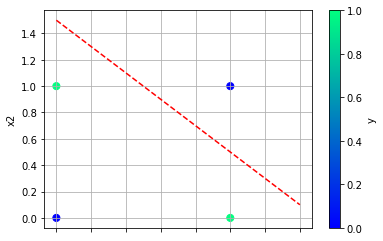

In [74]:
xor.plot(kind= "scatter", x="x1",y ='x2', c="y", s=50, cmap="winter")
plt.grid()
x=np.linspace(0,1.4)
y=1.5-1*np.linspace(0,1.4)

plt.plot(x, y, "r--")

## AND Gate visualisation (Linear Dataset)

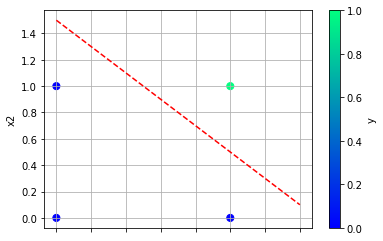

In [75]:
AND.plot(kind= "scatter", x="x1",y ='x2', c="y", s=50, cmap="winter")
plt.grid()
x=np.linspace(0,1.4)
y=1.5-1*np.linspace(0,1.4)

plt.plot(x, y, "r--")

# end